In [40]:
import pandas as pd
import os

### Merge 12 months of sales data into one 

In [41]:
files = [file for file in os.listdir('./Sales_Data')]

In [42]:
all_months_data = pd.DataFrame()

In [43]:
for file in files:
    pf = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, pf])

In [44]:
# all_months_data.to_csv("all_data.csv", index=False)

In [45]:
all_data = pd.read_csv("./all_data.csv")
all_data = all_data.dropna()

In [50]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Clean up data 

#### Find 'Or' and delete it 

In [49]:
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']

#### Convert coluns to correct type

In [57]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data['Quantity Ordered'])
all_data["Price Each"] =pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns 

#### Task #2: Add month column 

In [58]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')

#### Task 3: Add sales column 

In [60]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [61]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Question 1: What was the best month for sales? How much was earned that month? 

In [68]:
results = all_data.groupby("Month").sum()

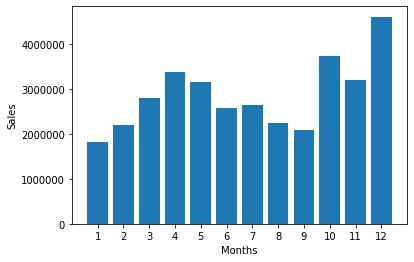

In [70]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

The mont